# NLTK PROCESS

## Dependances

In [291]:
import re
import os 
import sys
from urllib.request import urlopen
import requests
import pprint
import math


In [292]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.grammar import DependencyGrammar
from nltk.parse import CoreNLPParser



In [293]:
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [294]:
# from rich import print
from rich.console import Console
console=Console(record=True)

In [295]:
console.print(re.match('Jim','JimDowd'),style="bold black on white")

<re.Match object; span=(0, 3), match='Jim'>

## Get Data

### from file

In [296]:
with open("../data/t1.txt") as f:   
    text = f.read()
text

'The accumulator is a bellows type, precharged  with gaseous nitrogen to 1700 psig at 70Â° F. The gaseous nitrogen capacity of each accumulator is 115 cubic inches, and the hydraulic volume is 51 cubic inches.\n'

### from url

In [297]:
# url = "https://www.hq.nasa.gov/alsj/LM03_Apollo_Spacecraft_AS1-6.pdf"
# # html = urlopen(url).read()

# html= requests.get(url)


# text = BeautifulSoup(html.text, 'html.parser').get_text()
# text[:200]

## Text Pre-processing

### Sentence tokenizing:

In [298]:
sentences=sent_tokenize(text)
console.print(f'Number of sentences:{len(sentences)}')

console.print(sentences,style="bold blue on white")

Number of sentences:1

[
    'The accumulator is a bellows type, precharged  with gaseous nitrogen to 1700 psig at 
70Â° F. The gaseous nitrogen capacity of each accumulator is 115 cubic inches, and the 
hydraulic volume is 51 cubic inches.'
]

### Word tokenizing

In [299]:
words=word_tokenize(text)
console.print(f'Number of words: {len(words)}')

print(words)

Number of words: 38

['The', 'accumulator', 'is', 'a', 'bellows', 'type', ',', 'precharged', 'with', 'gaseous', 'nitrogen', 'to', '1700', 'psig', 'at', '70Â°', 'F.', 'The', 'gaseous', 'nitrogen', 'capacity', 'of', 'each', 'accumulator', 'is', '115', 'cubic', 'inches', ',', 'and', 'the', 'hydraulic', 'volume', 'is', '51', 'cubic', 'inches', '.']


### Find the frequency distribution

In [300]:
from nltk import FreqDist

# Find the frequency
fdist= FreqDist(words)

fdist.most_common(10)

[('is', 3),
 ('The', 2),
 ('accumulator', 2),
 (',', 2),
 ('gaseous', 2),
 ('nitrogen', 2),
 ('cubic', 2),
 ('inches', 2),
 ('a', 1),
 ('bellows', 1)]

### Plot the frequency graph

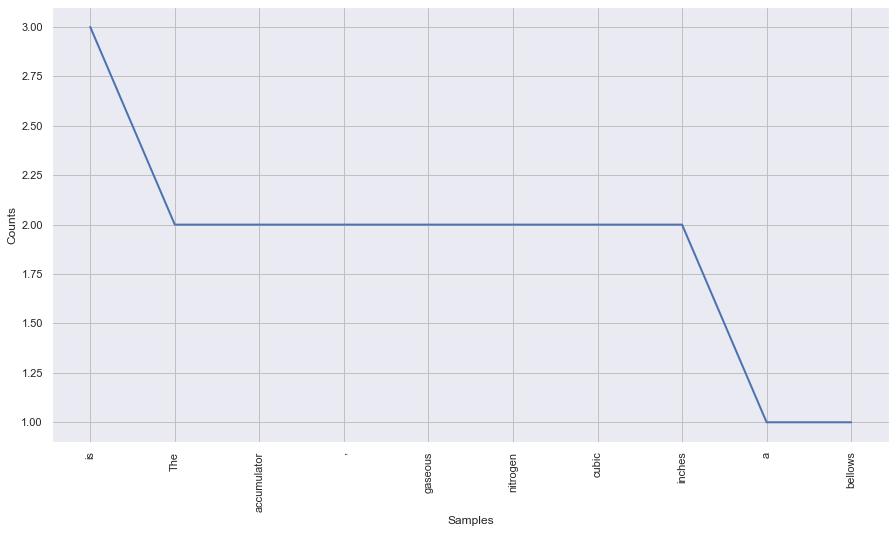

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [301]:
import matplotlib.pyplot as plt

fdist.plot(10)

### Remove punctuation marks

In [302]:

words_no_punc=[w for w in words if w.isalpha()==True]
print(words_no_punc[:50])
print(len(words_no_punc))

['The', 'accumulator', 'is', 'a', 'bellows', 'type', 'precharged', 'with', 'gaseous', 'nitrogen', 'to', 'psig', 'at', 'The', 'gaseous', 'nitrogen', 'capacity', 'of', 'each', 'accumulator', 'is', 'cubic', 'inches', 'and', 'the', 'hydraulic', 'volume', 'is', 'cubic', 'inches']
30


### Plotting graph without punctuation marks

In [303]:
fdist=FreqDist(words_no_punc)
fdist.most_common(10)

[('is', 3),
 ('The', 2),
 ('accumulator', 2),
 ('gaseous', 2),
 ('nitrogen', 2),
 ('cubic', 2),
 ('inches', 2),
 ('a', 1),
 ('bellows', 1),
 ('type', 1)]

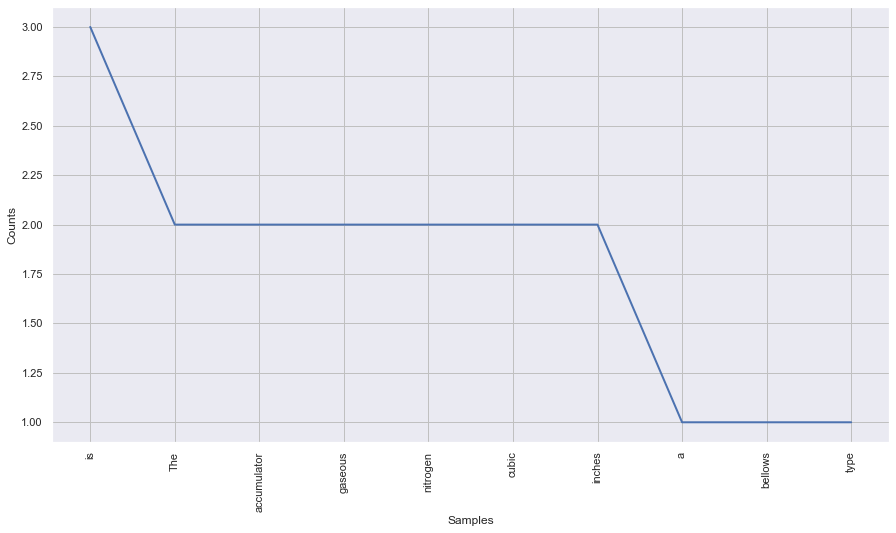

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [304]:
fdist.plot(10)

### List of stopwords

In [305]:
from nltk.corpus import stopwords

list_of_stopwords=stopwords.words("english")

print(list_of_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Removing stopwords

In [306]:
clean_words=[w for w in words_no_punc if w not in list_of_stopwords]

print(clean_words)

print(len(clean_words))



['The', 'accumulator', 'bellows', 'type', 'precharged', 'gaseous', 'nitrogen', 'psig', 'The', 'gaseous', 'nitrogen', 'capacity', 'accumulator', 'cubic', 'inches', 'hydraulic', 'volume', 'cubic', 'inches']
19


### Final frequency distribution

In [307]:
fdist=FreqDist(clean_words)

fdist.most_common(10)

[('The', 2),
 ('accumulator', 2),
 ('gaseous', 2),
 ('nitrogen', 2),
 ('cubic', 2),
 ('inches', 2),
 ('bellows', 1),
 ('type', 1),
 ('precharged', 1),
 ('psig', 1)]

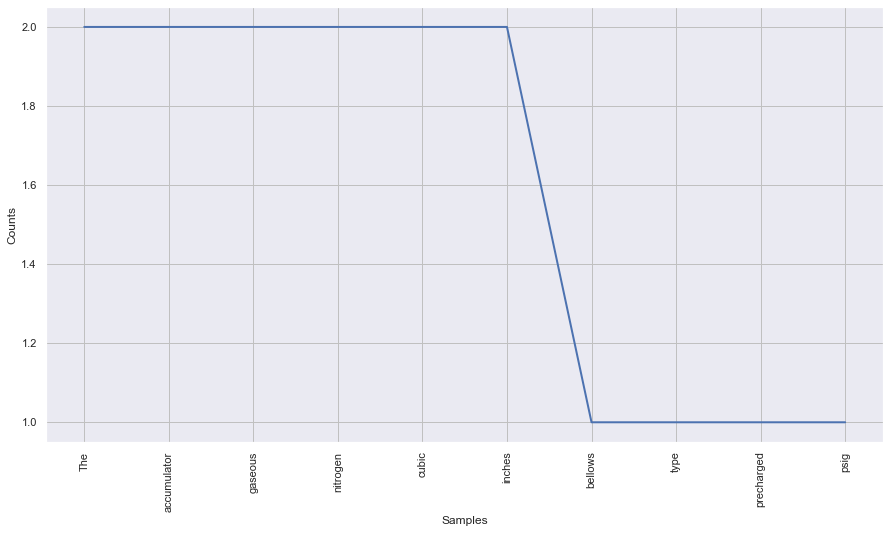

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [308]:
fdist.plot(10)

## Word Cloud

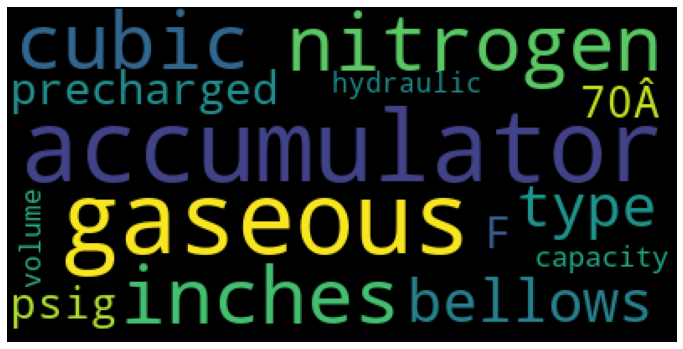

In [309]:
from wordcloud import WordCloud

wordcloud=WordCloud().generate(text)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [310]:
clean_words_joined=' '.join(clean_words)

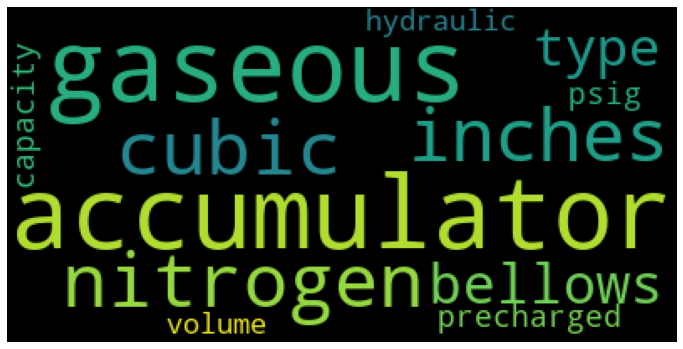

In [311]:
wordcloud=WordCloud().generate(clean_words_joined)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [312]:
wordcloud.words_

{'accumulator': 1.0,
 'gaseous': 1.0,
 'nitrogen': 1.0,
 'cubic': 1.0,
 'inches': 1.0,
 'bellows': 0.5,
 'type': 0.5,
 'precharged': 0.5,
 'psig': 0.5,
 'capacity': 0.5,
 'hydraulic': 0.5,
 'volume': 0.5}

## Stemming

In [313]:
from nltk.stem import PorterStemmer

porter=PorterStemmer()

# word_list=['Programming','Programmers','Programmable','orbiter','electrical','studies','leaves','plays','am','is','were']
word_list=words

stemmed_words=[porter.stem(w) for w in word_list]

print(stemmed_words)

['the', 'accumul', 'is', 'a', 'bellow', 'type', ',', 'precharg', 'with', 'gaseou', 'nitrogen', 'to', '1700', 'psig', 'at', '70â°', 'F.', 'the', 'gaseou', 'nitrogen', 'capac', 'of', 'each', 'accumul', 'is', '115', 'cubic', 'inch', ',', 'and', 'the', 'hydraul', 'volum', 'is', '51', 'cubic', 'inch', '.']


## Lemmatization

In [314]:
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

pos_list=['v','n','a','r']
print(f'word_list--->{word_list}')
for i in pos_list: 
    lemmatized_words=[lemmatizer.lemmatize(w,pos=i) for w in word_list]

    print(f' POS:{i}\n{lemmatized_words}')

word_list--->['The', 'accumulator', 'is', 'a', 'bellows', 'type', ',', 'precharged', 'with', 'gaseous', 'nitrogen', 'to', '1700', 'psig', 'at', '70Â°', 'F.', 'The', 'gaseous', 'nitrogen', 'capacity', 'of', 'each', 'accumulator', 'is', '115', 'cubic', 'inches', ',', 'and', 'the', 'hydraulic', 'volume', 'is', '51', 'cubic', 'inches', '.']
 POS:v
['The', 'accumulator', 'be', 'a', 'bellow', 'type', ',', 'precharged', 'with', 'gaseous', 'nitrogen', 'to', '1700', 'psig', 'at', '70Â°', 'F.', 'The', 'gaseous', 'nitrogen', 'capacity', 'of', 'each', 'accumulator', 'be', '115', 'cubic', 'inch', ',', 'and', 'the', 'hydraulic', 'volume', 'be', '51', 'cubic', 'inch', '.']
 POS:n
['The', 'accumulator', 'is', 'a', 'bellow', 'type', ',', 'precharged', 'with', 'gaseous', 'nitrogen', 'to', '1700', 'psig', 'at', '70Â°', 'F.', 'The', 'gaseous', 'nitrogen', 'capacity', 'of', 'each', 'accumulator', 'is', '115', 'cubic', 'inch', ',', 'and', 'the', 'hydraulic', 'volume', 'is', '51', 'cubic', 'inch', '.']
 POS:

## Part of Speech Tagging (PoS tagging)

In [315]:
tagged_words=nltk.pos_tag(word_list)
print(tagged_words)

[('The', 'DT'), ('accumulator', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('bellows', 'JJ'), ('type', 'NN'), (',', ','), ('precharged', 'VBN'), ('with', 'IN'), ('gaseous', 'JJ'), ('nitrogen', 'NN'), ('to', 'TO'), ('1700', 'CD'), ('psig', 'NN'), ('at', 'IN'), ('70Â°', 'CD'), ('F.', 'NNP'), ('The', 'DT'), ('gaseous', 'JJ'), ('nitrogen', 'NN'), ('capacity', 'NN'), ('of', 'IN'), ('each', 'DT'), ('accumulator', 'NN'), ('is', 'VBZ'), ('115', 'CD'), ('cubic', 'JJ'), ('inches', 'NNS'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('hydraulic', 'JJ'), ('volume', 'NN'), ('is', 'VBZ'), ('51', 'CD'), ('cubic', 'JJ'), ('inches', 'NNS'), ('.', '.')]


In [316]:
# sentence='The three-person EO-3 crew docked with Salyut 7 on 9 February, 1984, and entered the darkened station carrying flashlights.'
# sentence=text

# tokenized_words=word_tokenize(sentence)

# tagged_words=nltk.pos_tag(tokenized_words)

# tagged_words

## Chunking

In [317]:
grammar="NP : {<DT>?<JJ>*<NN>} "

parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)
# output.draw()

(S
  (NP The/DT accumulator/NN)
  is/VBZ
  (NP a/DT bellows/JJ type/NN)
  ,/,
  precharged/VBN
  with/IN
  (NP gaseous/JJ nitrogen/NN)
  to/TO
  1700/CD
  (NP psig/NN)
  at/IN
  70Â°/CD
  F./NNP
  (NP The/DT gaseous/JJ nitrogen/NN)
  (NP capacity/NN)
  of/IN
  (NP each/DT accumulator/NN)
  is/VBZ
  115/CD
  cubic/JJ
  inches/NNS
  ,/,
  and/CC
  (NP the/DT hydraulic/JJ volume/NN)
  is/VBZ
  51/CD
  cubic/JJ
  inches/NNS
  ./.)


## Chinking

In [322]:
grammar=r"""NP : {<.*>+} 
}<JJ>+{"""


output= parser.parse(tagged_words)

print(output)
# output.draw()

(S
  (NP The/DT accumulator/NN is/VBZ a/DT)
  bellows/JJ
  (NP type/NN ,/, precharged/VBN with/IN)
  gaseous/JJ
  (NP nitrogen/NN to/TO 1700/CD psig/NN at/IN 70Â°/CD F./NNP The/DT)
  gaseous/JJ
  (NP
    nitrogen/NN
    capacity/NN
    of/IN
    each/DT
    accumulator/NN
    is/VBZ
    115/CD)
  cubic/JJ
  (NP inches/NNS ,/, and/CC the/DT)
  hydraulic/JJ
  (NP volume/NN is/VBZ 51/CD)
  cubic/JJ
  (NP inches/NNS ./.))


## Named Entity Recognition (NER)

In [319]:
sentence=text

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)
N_E_R=nltk.ne_chunk(tagged_words,binary=False)

print(N_E_R)

(S
  The/DT
  accumulator/NN
  is/VBZ
  a/DT
  bellows/JJ
  type/NN
  ,/,
  precharged/VBN
  with/IN
  gaseous/JJ
  nitrogen/NN
  to/TO
  1700/CD
  psig/NN
  at/IN
  70Â°/CD
  F./NNP
  The/DT
  gaseous/JJ
  nitrogen/NN
  capacity/NN
  of/IN
  each/DT
  accumulator/NN
  is/VBZ
  115/CD
  cubic/JJ
  inches/NNS
  ,/,
  and/CC
  the/DT
  hydraulic/JJ
  volume/NN
  is/VBZ
  51/CD
  cubic/JJ
  inches/NNS
  ./.)


In [ ]:
# N_E_R.draw()


## WordNet

In [ ]:
from nltk.corpus import wordnet



In [ ]:
for words in wordnet.synsets('Mars'):
    print(f'{words.name()}\n{words.definition()}\n{words.examples()}\n')

    for lemma in words.lemmas():
        print(lemma)
    print('\n')

###  Hypernyms: Hypernyms gives us a more abstract term for a word.

In [ ]:
word=wordnet.synsets('rocket')[0]

print(word.hypernyms())

### Hyponyms: Hyponyms gives us a more specific term for a word.

In [ ]:
word=wordnet.synsets('rocket')[0]

print(word.hyponyms())

In [ ]:
[word.hyponyms()[i].name() for i in range(len(word.hyponyms()))]

### Get a name only

In [ ]:
word=wordnet.synsets('rocket')[0]
print(word.lemmas()[0].name())

### Synonyms.

In [ ]:
synonyms=[]

for words in wordnet.synsets('rocket'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
synonyms

### Antonyms

In [ ]:
antonyms=[]

for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
antonyms

### Synonyms and antonyms

In [ ]:
synonyms=[]
antonyms=[]
for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())


print(f'synonyms:\n{synonyms}\n')
print(f'antonyms:\n{antonyms}\n')

###  Finding the similarity between words

In [ ]:
word1=wordnet.synsets('ship','n')[0]

word2=wordnet.synsets('dog','n')[0]

word1.wup_similarity(word2)


# Bag-of-Words

In [ ]:
# from collections import Counter

# text=text.lower()
# Counter(word_tokenize(text))

# Counter(text).most_common(2)
# Counter(word_tokenize(text)).most_common(2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# sentences=['Jim is a person', 'Jim likes to fly.', 'Jim wants to walk his dog.']

ngrams=1
cv=CountVectorizer(stop_words='english',ngram_range=(ngrams,ngrams))

B_O_W= cv.fit_transform(sentences).toarray()
sum_words = B_O_W.sum(axis=0)
words_freq = [(word, sum_words[idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)


print(cv.vocabulary_)
print(cv.get_feature_names())
print(B_O_W)
print(f'BOW shape: {B_O_W.shape}')
print(sum_words)
print(words_freq)

In [ ]:
n=20
top_words = words_freq[0:n]
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

top_df.head()

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [ ]:
sentence=text

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)



tagged_words

## TF-IDF

In [ ]:
# num_of_words=sum(sum_words.tolist())
# num_of_words


# doc_words=cv.get_feature_names_out()

# freq=[round((i/4),3) for i in sum_words]

# len(doc_words)
# print(f'features: {doc_words}\nword counts: {sum_words}\nword frequency: {freq}')
# N=2
# num_docs_contain_word=1
# freq[0]*math.log(N/num_docs_contain_word)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(norm='l2',stop_words='english')

X=vectorizer.fit_transform(sentences).toarray()

print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
print(X)

In [ ]:
X.shape

## Sidebar